### Laboratorio Red Convolucional - Bastian Rojas

#### Parte 3: Arquitectura de una CNN

Una arquitectura típica de CNN consiste en capas alternadas de convolución y pooling, seguidas de capas completamente conectadas:



- Una capa convolucional con 32 filtros, tamaño de kernel 3x3 y activación ReLU.
- Una capa de max pooling con tamaño de pool 2x2.
- Una segunda capa convolucional con 64 filtros, tamaño de kernel 3x3 y activación ReLU.
- Una segunda capa de max pooling con tamaño de pool 2x2.
- Una tercera capa convolucional con 64 filtros, tamaño de kernel 3x3 y activación ReLU.
- Una capa completamente conectada con 64 unidades y activación ReLU.
- Una capa de salida con 10 unidades y activación softmax (para una clasificación de 10 clases).



### Explicación

1. **Capas Convolucionales**:
   - `self.conv1`: 32 filtros, tamaño de kernel 3x3, activación ReLU.
   - `self.conv2`: 64 filtros, tamaño de kernel 3x3, activación ReLU.
   - `self.conv3`: 64 filtros, tamaño de kernel 3x3, activación ReLU.

2. **Capas de Pooling**:
   - `self.pool1`: Max pooling con tamaño 2x2.
   - `self.pool2`: Max pooling con tamaño 2x2.
   - `self.pool3`: Max pooling con tamaño 2x2.

3. **Capas Completamente Conectadas**:
   - `self.fc1`: 64 unidades, activación ReLU.
   - `self.fc2`: 10 unidades (para 10 clases de salida).

4. **Aplanado**:
   - `x = x.view(-1, 64 * 4 * 4)`: Aplanar las características antes de pasar a las capas completamente conectadas.

### Uso del Modelo

Para usar este modelo, puedes definir un conjunto de datos, un optimizador y un criterio de pérdida, y luego entrenar la red con tus datos.

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Capa convolucional 1: 32 filtros, kernel 3x3, activación ReLU
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        # Capa de max pooling 1: tamaño del pool 2x2
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Capa convolucional 2: 64 filtros, kernel 3x3, activación ReLU
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        # Capa de max pooling 2: tamaño del pool 2x2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Capa convolucional 3: 64 filtros, kernel 3x3, activación ReLU
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        # Capa de max pooling 3: tamaño del pool 2x2
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Capa completamente conectada: 64 unidades, activación ReLU
        self.fc1 = nn.Linear(64 * 4 * 4, 64)
        # Capa de salida: 10 unidades (para clasificación en 10 clases), activación softmax
        self.out1 = nn.Linear(64, 10)

    def forward(self, x):
        # Aplicar la primera capa convolucional seguida de ReLU y pooling
        x = self.pool1(F.relu(self.conv1(x)))
        # Aplicar la segunda capa convolucional seguida de ReLU y pooling
        x = self.pool2(F.relu(self.conv2(x)))
        # Aplicar la tercera capa convolucional seguida de ReLU y pooling
        x = self.pool3(F.relu(self.conv3(x)))
        # Aplanar las características para la capa completamente conectada
        x = x.view(-1, 64 * 4 * 4)
        # Aplicar la primera capa completamente conectada seguida de ReLU
        x = F.relu(self.fc1(x))
        # Aplicar la capa de salida
        x = F.softmax(self.out1(x), dim=1)
        return x

# Crear una instancia de la red
net = CNN()

# Mostrar la arquitectura del modelo
print(net)


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (out1): Linear(in_features=64, out_features=10, bias=True)
)


In [4]:
import torchvision.datasets as dsets

train_dataset = dsets.CIFAR10(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.CIFAR10(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:10<00:00, 16298722.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [5]:
batch_size = 16
n_iters = 5
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
model = CNN()
criterion = nn.CrossEntropyLoss()

In [7]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
from torch.utils.data import random_split

# Dividir el conjunto de entrenamiento para validación
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

best_val_loss = float('inf')

for epoch in range(10):
    model.train()  # Poner el modelo en modo de entrenamiento
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Evaluación con el conjunto de validación
    model.eval()  # Poner el modelo en modo de evaluación
    with torch.no_grad():
        val_loss = 0.0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Cálculo de las medias de las pérdidas
    train_loss = running_loss / len(train_loader)
    val_loss = val_loss / len(test_loader)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Guardar el mejor modelo
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')

print("Finished Training")

Epoch 1, Train Loss: 2.3022, Val Loss: 2.3018
Epoch 2, Train Loss: 2.3007, Val Loss: 2.2981
Epoch 3, Train Loss: 2.2766, Val Loss: 2.2513
Epoch 4, Train Loss: 2.2286, Val Loss: 2.1986
Epoch 5, Train Loss: 2.1734, Val Loss: 2.1376
Epoch 6, Train Loss: 2.1414, Val Loss: 2.1142
Epoch 7, Train Loss: 2.1186, Val Loss: 2.1008
Epoch 8, Train Loss: 2.0941, Val Loss: 2.0826
Epoch 9, Train Loss: 2.0728, Val Loss: 2.0474
Epoch 10, Train Loss: 2.0527, Val Loss: 2.0305
Finished Training


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


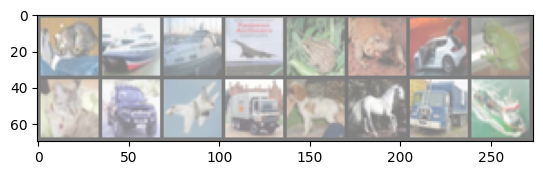

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 


In [15]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))

In [16]:
outputs = model(images)

In [17]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(16)))

Predicted:  cat   ship  car   ship  deer  frog  car   frog  dog   car   ship  truck dog   car   car   ship 
